**Last digit of the name in label data is the target label**

In [19]:
import os
nums = os.listdir('data')
nums = [os.path.splitext(s)[0][-1] for s in nums]
import pandas as pd
nums = pd.DataFrame(nums)
print(len(os.listdir('data')))
nums.value_counts()

1103


7    137
3    129
4    116
0    112
2    111
5    111
6    111
8    111
9    109
1     56
dtype: int64

c:\Users\Leong Teng Man\Documents\university\2022\sem 1\BSD3523 MACHINE LEARNING\Project\utils.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  digits = np.array(digits)


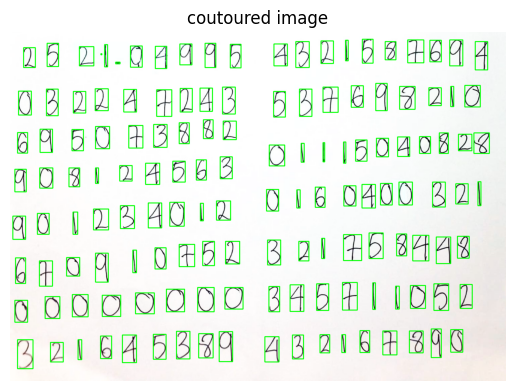

In [11]:
from utils import *
import cv2
rel_dir = 'raw image'
filename = 'sca3.jpg'

img = cv2.imread(f'{rel_dir}/{filename}')
digits = crop_number(img.copy(), True)

In [12]:
labelled_digits, labels = manual_label(digits[:])

137


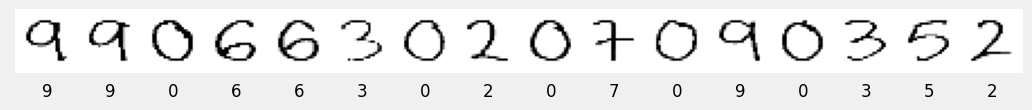

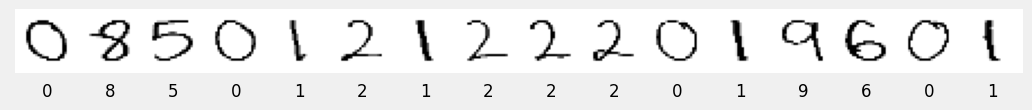

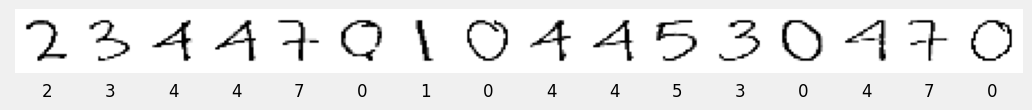

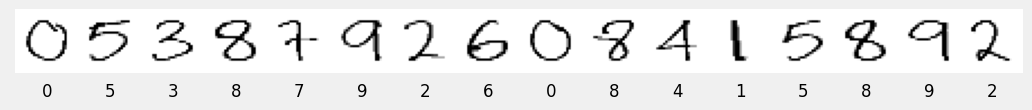

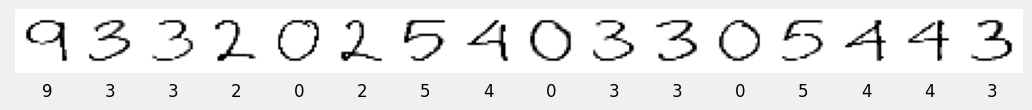

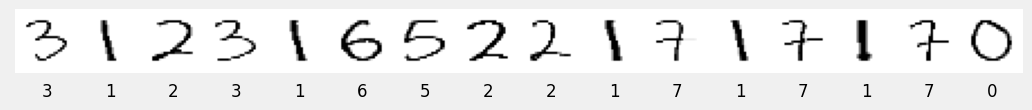

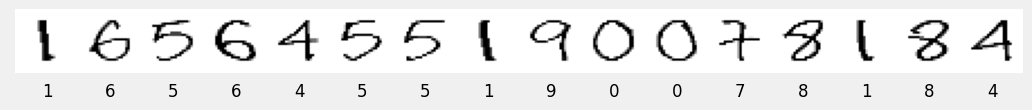

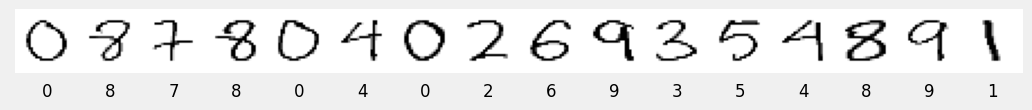

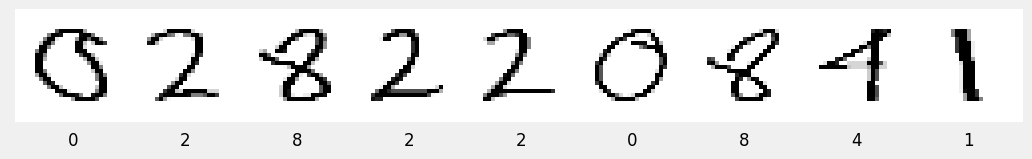

In [15]:
print(len(labels))
final_digits = transform_cropped_digit(labelled_digits, labels)
display_digits_alt_line(final_digits, labels, '', len(labels))

In [16]:
save_label_digit(final_digits, labels)